In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# from sklearn.metrics import  classification_report
# from sklearn.metrics import ConfusionMatrixDisplay
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import roc_curve, auc

# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import cross_val_score

# from sklearn import tree
# from sklearn.tree import DecisionTreeClassifier

%matplotlib inline 

In [2]:
import importlib
import ids_common
importlib.reload(ids_common)

<module 'ids_common' from 'd:\\stuff\\univ\\ids\\ids_common.py'>

In [3]:
df = pd.read_csv('./dataset/Edge-IIoTset-dataset/Selected dataset for ML and DL/DNN-EdgeIIoT-dataset.csv', low_memory=False)
ids_common.cleanup_dataset_ferrag(df)

mixed_zeros = ['mqtt.topic', 
                'mqtt.conack.flags', 
                'mqtt.protoname',
                'dns.qry.name.len',
                'http.request.method',
                'http.referer', 
                'http.request.version']

for col in mixed_zeros:
    df.loc[(df[col] == '0') | (df[col] == '0x00000000'), col] = '0.0'

ids_common.drop_na_dups(df, verbose=True)
df['Attack_type'] = df['Attack_type'].astype('category')

object_col = [col for col in df.columns if df[col].dtype == 'object']
for col in object_col:
    ids_common.encode_text_dummy(df, col)

df.info()

Before: dropna: NA: 0, DUPS: 309530
After: dropna: NA: 0, DUPS: 0
<class 'pandas.core.frame.DataFrame'>
Index: 1909671 entries, 0 to 2219193
Data columns (total 89 columns):
 #   Column                                                                                                Dtype   
---  ------                                                                                                -----   
 0   arp.opcode                                                                                            float64 
 1   arp.hw.size                                                                                           float64 
 2   icmp.checksum                                                                                         float64 
 3   icmp.seq_le                                                                                           float64 
 4   icmp.unused                                                                                           float64 
 5   http.cont

In [4]:
from sklearn.manifold import TSNE

In [9]:
print(df.shape)
df.shape[0]/100

(1909671, 89)


19096.71

In [27]:
sample = df.sample(n=df.shape[0]//200)
sample.shape

(9548, 89)

In [28]:
target_label_2_class = 'Attack_label' # 0 indicates normal and 1 indicates attacks
target_label_15_class = 'Attack_type'


y2 = sample[target_label_2_class]
y15 = sample[target_label_15_class]
X = sample.drop([target_label_2_class, target_label_15_class], axis=1, inplace=False)

In [29]:
tsne = TSNE()
tsne_result  = tsne.fit_transform(X)
# 10k * 89 = 15sec
# 20k * 89 = 32sec
# 40k * 89 = 69sec

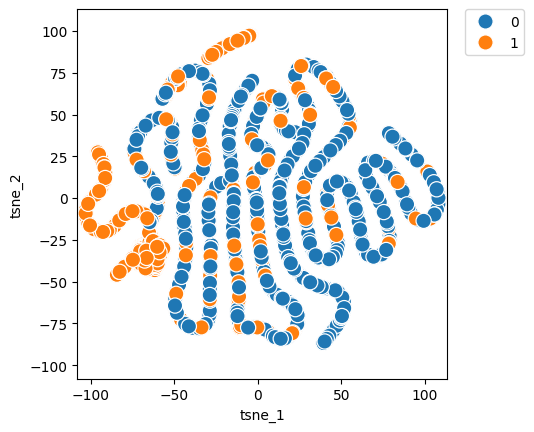

In [30]:
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y2})

fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

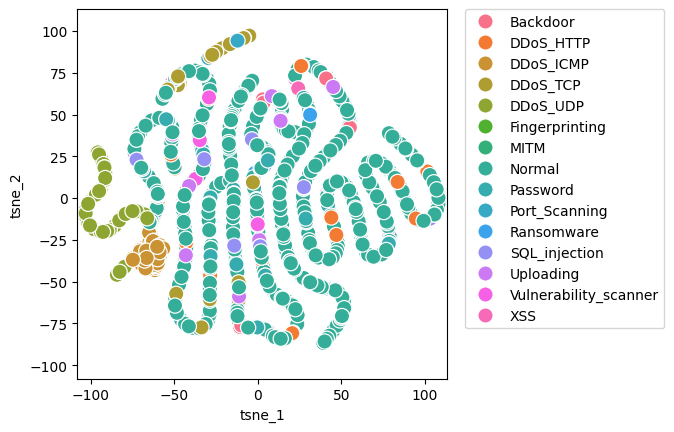

In [31]:
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y15})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()